# K-Nearest Neighbour Regression

### Danny Rachmadian Yusuf Satryatama

## Import Libaries and Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('Students_Social_Media_Addiction_Feature_Engineered.csv')

## Data Exploration

In [5]:
# Display the first few rows of the dataframe
print("Dataset Head:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
df.info()

print("\nNumber of Rows and Columns:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Dataset Head:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score  ... Academic_Level_Encod

In [6]:
# Statistical summary
print("Statistical Summary")
print("="*50)
df.describe()

Statistical Summary


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Adequate_Sleep,Gender_Encoded,Academic_Level_Encoded,Relationship_Status_Encoded,SM_Impact_Score,Lifestyle_Balance
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879,0.472340,0.499291,1.039716,1.499291,3.558865,1.950213
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165,0.499589,0.500354,0.980555,0.584178,2.781388,2.256362
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.700000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.100000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000,0.000000,0.000000,2.000000,2.000000,4.700000,2.200000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000,1.000000,1.000000,2.000000,2.000000,5.800000,3.700000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000,1.000000,1.000000,2.000000,2.000000,8.500000,7.400000


## Defining Features and Target


Target variable 'Addicted_Score' statistics:
count    705.000000
mean       6.436879
std        1.587165
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Addicted_Score, dtype: float64


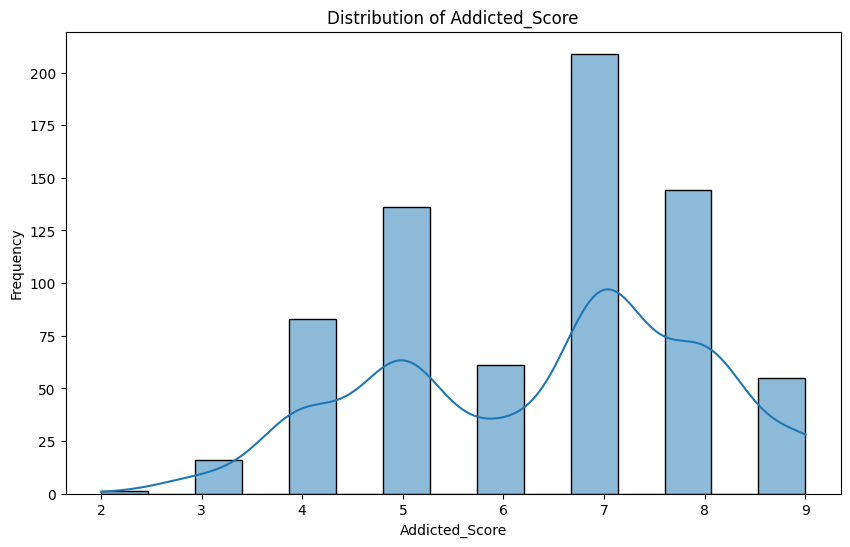


Top 10 features correlated with Addicted_Score:
Addicted_Score                 1.000000
Mental_Health_Score            0.945051
Conflicts_Over_Social_Media    0.933586
SM_Impact_Score                0.915776
Lifestyle_Balance              0.845623
Avg_Daily_Usage_Hours          0.832000
Sleep_Hours_Per_Night          0.764858
Adequate_Sleep                 0.690550
Age                            0.166396
Academic_Level_Encoded         0.075543
Name: Addicted_Score, dtype: float64


In [7]:
# Target variable analysis
target = 'Addicted_Score'
print(f"\nTarget variable '{target}' statistics:")
print(df[target].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True, bins=15)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()

# Get top 10 features most correlated with target
top_corr = df[numeric_columns].corr()['Addicted_Score'].abs().sort_values(ascending=False)[:10]
print("\nTop 10 features correlated with Addicted_Score:")
print(top_corr[:11])

In [8]:
# Define X (features) by dropping all columns except target
X = df.drop(['Addicted_Score'], axis=1)

# Define y (target)
y = df['Addicted_Score']

print("Feature columns:")
print(X.columns.tolist())
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

Feature columns:
['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Adequate_Sleep', 'Gender_Encoded', 'Academic_Level_Encoded', 'Relationship_Status_Encoded', 'SM_Impact_Score', 'Lifestyle_Balance', 'Usage_Category_Medium', 'Usage_Category_High', 'Usage_Category_Very High', 'Mental_Health_Risk_Medium', 'Mental_Health_Risk_Low', 'Mental_Health_Risk_Very Low']

Number of features: 24
Number of samples: 705


In [9]:
print(f"\nFull data shape: {X.shape}")

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


Full data shape: (705, 24)
Numerical features: ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Adequate_Sleep', 'Gender_Encoded', 'Academic_Level_Encoded', 'Relationship_Status_Encoded', 'SM_Impact_Score', 'Lifestyle_Balance']
Categorical features: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']


In [10]:
# Select only numeric columns for modeling (exclude categorical string columns)
# Keep the encoded versions instead of original categorical columns
exclude_columns = ['Student_ID', 'Gender', 'Academic_Level', 'Country',
                     'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']
X = X.drop(columns=exclude_columns)

print("Feature columns after removing categorical string columns:")
print(X.columns.tolist())
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

# Verify all columns are numeric
print(f"\nData types of features:")
print(X.dtypes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Feature columns after removing categorical string columns:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Adequate_Sleep', 'Gender_Encoded', 'Academic_Level_Encoded', 'Relationship_Status_Encoded', 'SM_Impact_Score', 'Lifestyle_Balance', 'Usage_Category_Medium', 'Usage_Category_High', 'Usage_Category_Very High', 'Mental_Health_Risk_Medium', 'Mental_Health_Risk_Low', 'Mental_Health_Risk_Very Low']

Number of features: 17
Number of samples: 705

Data types of features:
Age                              int64
Avg_Daily_Usage_Hours          float64
Sleep_Hours_Per_Night          float64
Mental_Health_Score              int64
Conflicts_Over_Social_Media      int64
Adequate_Sleep                   int64
Gender_Encoded                   int64
Academic_Level_Encoded           int64
Relationship_Status_Encoded      int64
SM_Impact_Score                float64
Lifestyle_Balance              float64
Usage_Category_Medium            

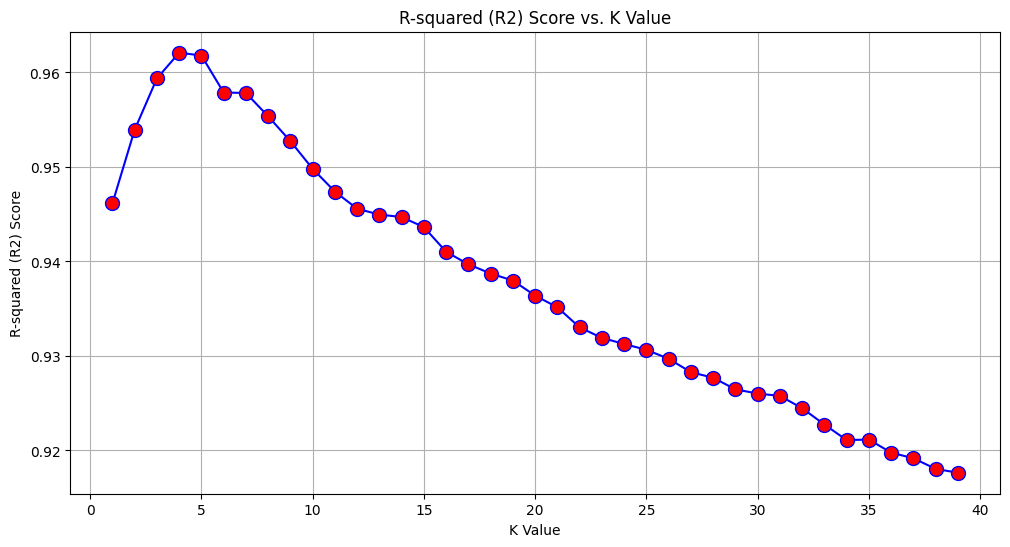


Optimal K value based on maximum R-squared score: 4


In [11]:
r2_scores = []
k_range = range(1, 40)

for i in k_range:
    # Initialize and train the KNeighborsRegressor
    knn_regressor = KNeighborsRegressor(n_neighbors=i)
    knn_regressor.fit(X_train, y_train)

    # Make predictions
    pred_i = knn_regressor.predict(X_test)

    # Calculate the R-squared score for the current K
    r2_i = r2_score(y_test, pred_i)
    r2_scores.append(r2_i) # Append R2 score

# Visualize the R2 Score vs. K Value
plt.figure(figsize=(12, 6))
# Plotting R2 Score vs K Value
plt.plot(k_range, r2_scores, color='blue', linestyle='solid', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R-squared (R2) Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('R-squared (R2) Score')
plt.grid(True)
plt.show()

# Find the K with the maximum R2 score (higher R2 is better)
optimal_k_index = np.argmax(r2_scores)
optimal_k_value = k_range[optimal_k_index]

print(f"\nOptimal K value based on maximum R-squared score: {optimal_k_value}")

# Scenarios

## Scenario 1: Feature Selection

1. Using all of the features (No Feature Selection)
2. Using SelectKBest to select the top K best features


In [12]:
print("Feature Selection Analysis")
print("=" * 31)
print(f"Original number of features: {X_train.shape[1]}")

Feature Selection Analysis
Original number of features: 17


In [13]:
print("\nScenario 1.1: Using all features (No Feature Selection)")
print("=" * 50)

# Initialize and train the KNeighborsRegressor with the optimal k value
# Use the processed training data
knn_regressor_all_features = KNeighborsRegressor(n_neighbors=optimal_k_value)
knn_regressor_all_features.fit(X_train, y_train)

# Make predictions using the processed test data
y_pred_all_features = knn_regressor_all_features.predict(X_test)

# Evaluate the R2 Score of the model
r2_all_features = r2_score(y_test, y_pred_all_features)

print(f"R-squared (R2) Score with all features: {r2_all_features:.4f}")


Scenario 1.1: Using all features (No Feature Selection)
R-squared (R2) Score with all features: 0.9621



Scenario 1.2: Using SelectKBest for Feature Selection


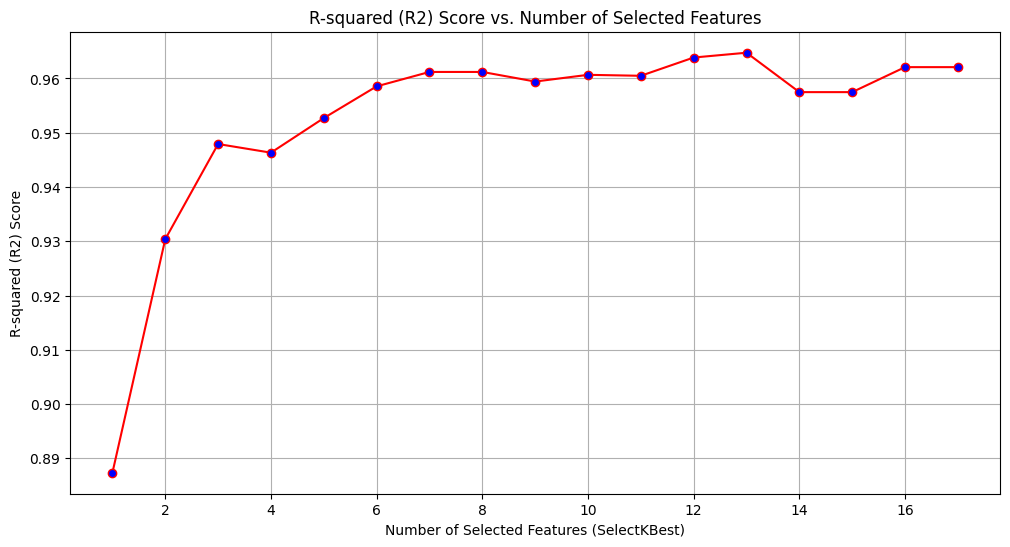


Optimal number of features based on maximum R-squared score: 13
Selecting top 13 features using SelectKBest.

Selected feature names:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Adequate_Sleep', 'Academic_Level_Encoded', 'SM_Impact_Score', 'Lifestyle_Balance', 'Usage_Category_Medium', 'Usage_Category_Very High', 'Mental_Health_Risk_Medium', 'Mental_Health_Risk_Low']


In [14]:
print("\nScenario 1.2: Using SelectKBest for Feature Selection")
print("=" * 60)

r2_scores_feature_selection = []
# Define a range for the number of features to select
num_features_range = range(1, X_train.shape[1] + 1)

for num_features in num_features_range:
    # Initialize SelectKBest with the current number of features
    selector = SelectKBest(score_func=f_regression, k=num_features)

    # Fit SelectKBest on the processed training data and transform both train/test
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Initialize and train KNeighborsRegressor with the already found optimal k
    knn_regressor = KNeighborsRegressor(n_neighbors=optimal_k_value)
    knn_regressor.fit(X_train_selected, y_train)

    # Make predictions on the feature-selected test data
    y_pred = knn_regressor.predict(X_test_selected)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores_feature_selection.append(r2)

# Plot the R2 Score vs. Number of Features
plt.figure(figsize=(12, 6))
plt.plot(num_features_range, r2_scores_feature_selection, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=6)
plt.title('R-squared (R2) Score vs. Number of Selected Features')
plt.xlabel('Number of Selected Features (SelectKBest)')
plt.ylabel('R-squared (R2) Score')
plt.grid(True)
plt.show()

# Find the number of features with the MAXIMUM R2 score
optimal_num_features_index = np.argmax(r2_scores_feature_selection)
optimal_num_features = num_features_range[optimal_num_features_index]

print(f"\nOptimal number of features based on maximum R-squared score: {optimal_num_features}")

# Use the optimal number of features
num_features_to_select = optimal_num_features

print(f"Selecting top {num_features_to_select} features using SelectKBest.")

# --- FIX STARTS HERE ---
# Re-initialize SelectKBest with the optimal number of features
selector_optimal = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit SelectKBest on the training data to identify the optimal features
selector_optimal.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_indices = selector_optimal.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
# --- FIX ENDS HERE ---

# Print the selected feature names
print("\nSelected feature names:")
print(selected_feature_names.tolist())

In [15]:
# Initialize SelectKBest
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)

# Fit SelectKBest on the training data and transform both the training and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

print("\nSelected feature names:")
print(selected_feature_names.tolist())

print(f"\nTraining set shape after feature selection: {X_train_selected.shape}")
print(f"Test set shape after feature selection: {X_test_selected.shape}")

# Initialize and train the KNeighborsRegressor with the optimal k value
knn_regressor_selected_features = KNeighborsRegressor(n_neighbors=optimal_k_value)
knn_regressor_selected_features.fit(X_train_selected, y_train)

# Make predictions using the FEATURE-SELECTED test data
y_pred_selected_features = knn_regressor_selected_features.predict(X_test_selected)

# Evaluate the R2 Score of the model
r2_selected_features = r2_score(y_test, y_pred_selected_features)

print(f"R-squared (R2) Score with selected features: {r2_selected_features:.4f}")


Selected feature names:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Adequate_Sleep', 'Academic_Level_Encoded', 'SM_Impact_Score', 'Lifestyle_Balance', 'Usage_Category_Medium', 'Usage_Category_Very High', 'Mental_Health_Risk_Medium', 'Mental_Health_Risk_Low']

Training set shape after feature selection: (564, 13)
Test set shape after feature selection: (141, 13)
R-squared (R2) Score with selected features: 0.9647


In [16]:
print("\nComparison of Model Performance:")
print("=" * 50)
print(f"Metric         | All Features | Selected Features")
print(f"R2 Score       | {r2_all_features:.4f}       | {r2_selected_features:.4f}")


Comparison of Model Performance:
Metric         | All Features | Selected Features
R2 Score       | 0.9621       | 0.9647


Visualizing Scenario 1: Feature Selection R2 Score Performance


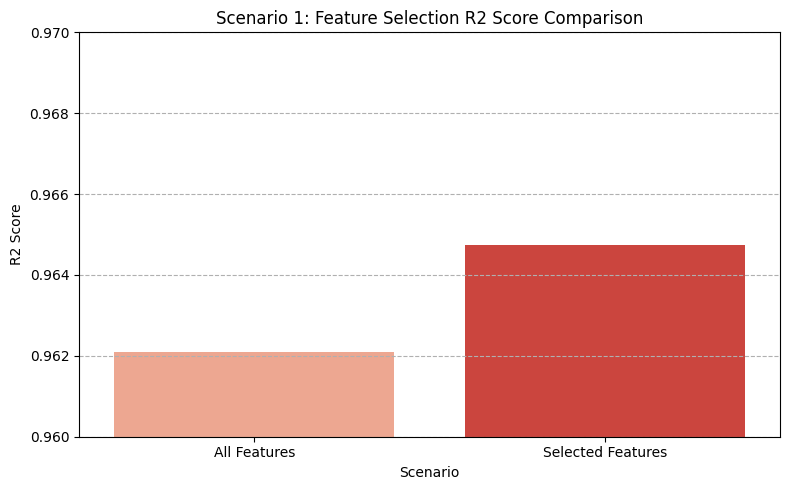


The Best Scenario based on R2 is: Selected Features


In [17]:
print("Visualizing Scenario 1: Feature Selection R2 Score Performance")
print("="*60)

scenario1_labels = ['All Features', 'Selected Features']
scenario1_r2 = [r2_all_features, r2_selected_features]

scenario1_df = pd.DataFrame({
    'Scenario': scenario1_labels,
    'R2 Score': scenario1_r2
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Scenario', y='R2 Score', data=scenario1_df, palette='Reds')
plt.title('Scenario 1: Feature Selection R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Scenario')
plt.ylim(0.96, 0.97)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

if r2_selected_features > r2_all_features:
    best_scenario = "Selected Features"
elif r2_all_features > r2_selected_features:
    best_scenario = "All Features"
else:
    best_scenario = "Both scenarios have equal R2"

print(f"\nThe Best Scenario based on R2 is: {best_scenario}")

## Scenario 2: Normalization

1. No Normalization
2. Using StandardScaler

In [18]:
# Scenario 2.1: No Normalization (Using the data after feature selection)
print("\nScenario 2.1: No Normalization")
print("=" * 50)

# Initialize and train KNeighborsRegressor with the optimal k value
knn_regressor_no_norm = KNeighborsRegressor(n_neighbors=optimal_k_value)
knn_regressor_no_norm.fit(X_train_selected, y_train)

# Make predictions
y_pred_no_norm = knn_regressor_no_norm.predict(X_test_selected)

# Evaluate the R2 Score of the model
r2_no_norm = r2_score(y_test, y_pred_no_norm)

print(f"R-squared (R2) Score without normalization: {r2_no_norm:.4f}")


Scenario 2.1: No Normalization
R-squared (R2) Score without normalization: 0.9647


In [19]:
# Scenario 2.2: With Normalization using StandardScaler
print("\nScenario 2.2: With Normalization using StandardScaler")
print("=" * 60)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the test data
X_test_scaled = scaler.transform(X_test_selected)

# Initialize and train KNeighborsRegressor with the optimal k value
knn_regressor_scaled = KNeighborsRegressor(n_neighbors=optimal_k_value)
knn_regressor_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = knn_regressor_scaled.predict(X_test_scaled)

# Evaluate the R2 Score of the model
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"R-squared (R2) Score with normalization: {r2_scaled:.4f}")


Scenario 2.2: With Normalization using StandardScaler
R-squared (R2) Score with normalization: 0.9656


In [20]:
print("\nComparison of Model Performance:")
print("=" * 50)
print(f"Metric         | All Features | Selected Features")
print(f"R2 Score       | {r2_no_norm:.4f}       | {r2_scaled:.4f}")


Comparison of Model Performance:
Metric         | All Features | Selected Features
R2 Score       | 0.9647       | 0.9656



Visualizing Scenario 2: Normalization R2 Score Performance


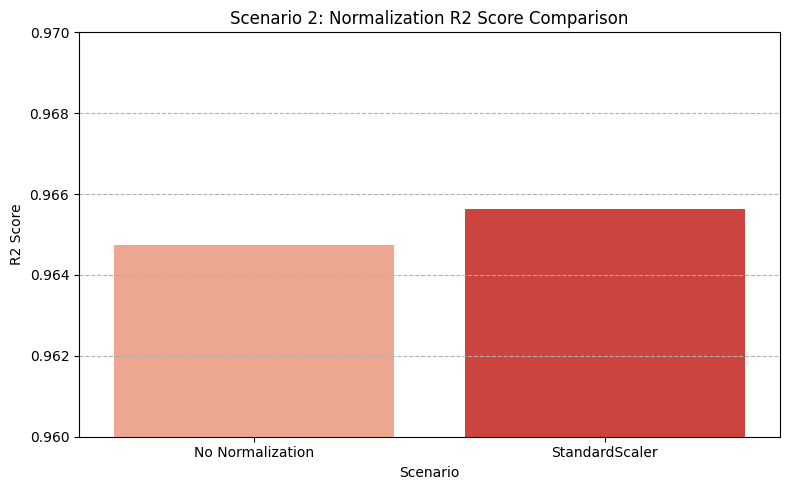


The Best Normalization Scenario based on R2 is: With Normalization Using StandardScaler


In [21]:
print("\nVisualizing Scenario 2: Normalization R2 Score Performance")
print("="*60)

scenario2_labels = ['No Normalization', 'StandardScaler']
scenario2_r2 = [r2_no_norm, r2_scaled]

scenario2_df = pd.DataFrame({
    'Scenario': scenario2_labels,
    'R2 Score': scenario2_r2
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Scenario', y='R2 Score', data=scenario2_df, palette='Reds')
plt.title('Scenario 2: Normalization R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Scenario')
plt.ylim(0.96,0.97)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

if r2_scaled > r2_no_norm:
    best_normalization_scenario = "With Normalization Using StandardScaler"
elif r2_no_norm > r2_scaled:
    best_normalization_scenario = "No Normalization"
else:
    best_normalization_scenario = "Both scenarios have equal R2"

print(f"\nThe Best Normalization Scenario based on R2 is: {best_normalization_scenario}")

## Scenario 3: Parameter Tuning

In [53]:
print("\nScenario 3.1: Not-Tuned (using optimal_k_value found earlier)")
print("=" * 60)

# Train a model using the optimal_k_value found from the initial plot
knn_regressor_not_tuned = KNeighborsRegressor(n_neighbors=optimal_k_value)
knn_regressor_not_tuned.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_not_tuned = knn_regressor_not_tuned.predict(X_test_scaled)

# Evaluate the R2 Score of the model
r2_not_tuned = r2_score(y_test, y_pred_not_tuned)

print(f"R-squared (R2) Score not tuned: {r2_not_tuned:.4f}")


Scenario 3.1: Not-Tuned (using optimal_k_value found earlier)
R-squared (R2) Score not tuned: 0.9656


In [54]:
# Scenario 3.2: Tuned (using GridSearchCV)
print("\nScenario 3.2: Tuned (using GridSearchCV)")
print("=" * 75)

# Define the parameter grid for multiple hyperparameters
param_grid_tuned = {
    'n_neighbors': range(1, 40),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# Initialize the KNeighborsRegressor model
knn_tuned = KNeighborsRegressor()

# Initialize GridSearchCV with the expanded parameter grid
grid_search_tuned = GridSearchCV(knn_tuned, param_grid_tuned, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the scaled training data
grid_search_tuned.fit(X_train_scaled, y_train)

# Get the best parameters found by GridSearchCV
best_params_tuned = grid_search_tuned.best_params_
print(f"\nBest parameters found by GridSearchCV: {best_params_tuned}")

# Get the best cross-validation score (negative MSE)
best_cv_score_tuned = grid_search_tuned.best_score_
print(f"Best cross-validation negative MSE: {best_cv_score_tuned:.4f}")
print(f"Corresponding cross-validation RMSE: {np.sqrt(-best_cv_score_tuned):.4f}")

# Train the final model with the best parameters on the entire scaled training data
final_knn_model_tuned = KNeighborsRegressor(**best_params_tuned) # Use double asterisk to unpack the dictionary

# Use the data from the best normalization scenario for final training
final_knn_model_tuned.fit(X_train_scaled, y_train)

# Make predictions on the independent test set (using X_test_scaled)
y_pred_tuned = final_knn_model_tuned.predict(X_test_scaled)

# Evaluate the R2 Score of the model
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nR-squared (R2) Score with tuned parameters: {r2_tuned:.4f}")


Scenario 3.2: Tuned (using GridSearchCV)

Best parameters found by GridSearchCV: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best cross-validation negative MSE: -0.0912
Corresponding cross-validation RMSE: 0.3021

R-squared (R2) Score with tuned parameters: 0.9631



Visualizing Scenario 3.2: Parameter Tuning R2 Score Performance


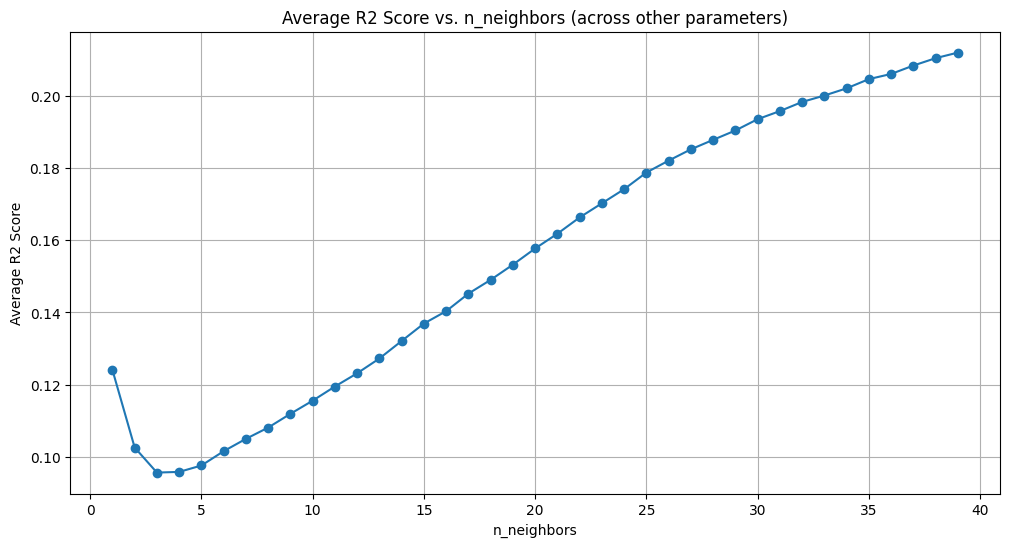

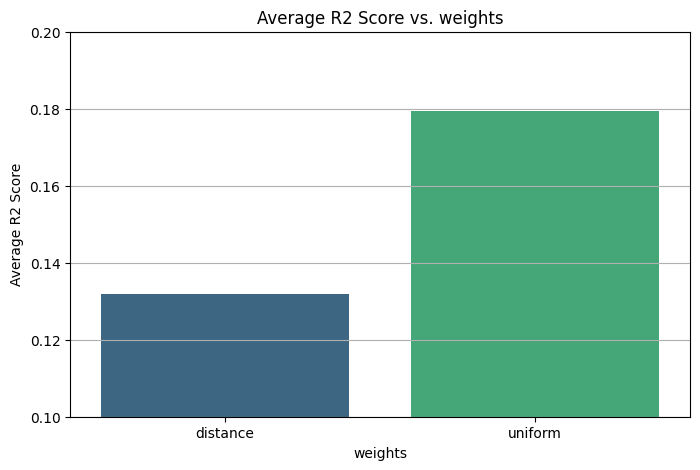

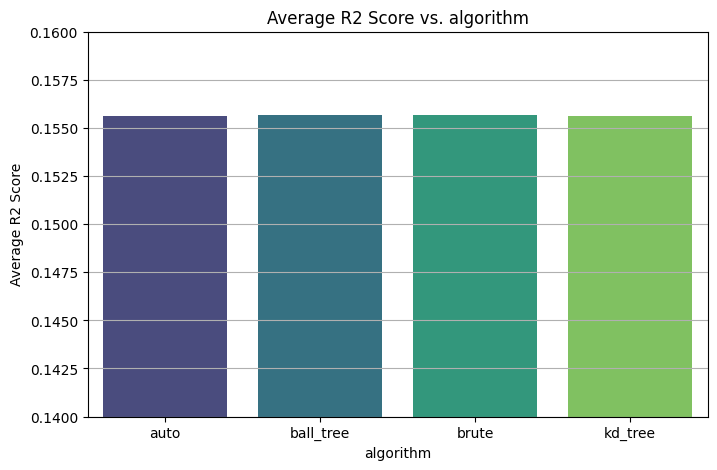

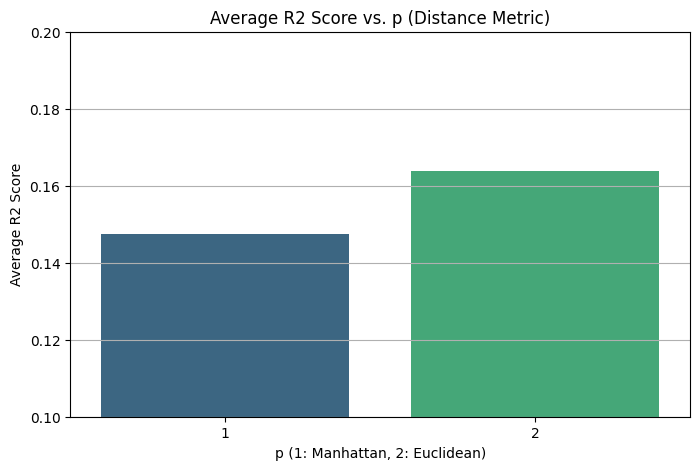

In [55]:
print("\nVisualizing Scenario 3.2: Parameter Tuning R2 Score Performance")
print("="*60)

# Get the cv_results_ from the fitted GridSearchCV
results = grid_search_tuned.cv_results_

# Convert results to a pandas DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Sort by mean test score (the higher the better) to see the impact of parameters
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(12, 6))
# This gives a general trend, but it's an average across different combinations of other params
n_neighbors_performance = results_df.groupby('param_n_neighbors')['mean_test_score'].mean()
plt.plot(n_neighbors_performance.index, -n_neighbors_performance.values, marker='o')
plt.title('Average R2 Score vs. n_neighbors (across other parameters)')
plt.xlabel('n_neighbors')
plt.ylabel('Average R2 Score')
plt.grid(True)
plt.show()

# Visualize R2 vs weights
plt.figure(figsize=(8, 5))
weights_performance = results_df.groupby('param_weights')['mean_test_score'].mean()
sns.barplot(x=weights_performance.index, y=-weights_performance.values, palette='viridis')
plt.title('Average R2 Score vs. weights')
plt.xlabel('weights')
plt.ylabel('Average R2 Score')
plt.ylim(0.1, 0.2)
plt.grid(axis='y')
plt.show()

# Visualize R2 vs algorithm
plt.figure(figsize=(8, 5))
algorithm_performance = results_df.groupby('param_algorithm')['mean_test_score'].mean()
sns.barplot(x=algorithm_performance.index, y=-algorithm_performance.values, palette='viridis')
plt.title('Average R2 Score vs. algorithm')
plt.xlabel('algorithm')
plt.ylabel('Average R2 Score')
plt.ylim(0.14, 0.16)
plt.grid(axis='y')
plt.show()

# Visualize R2 vs p
plt.figure(figsize=(8, 5))
p_performance = results_df.groupby('param_p')['mean_test_score'].mean()
sns.barplot(x=p_performance.index, y=-p_performance.values, palette='viridis')
plt.title('Average R2 Score vs. p (Distance Metric)')
plt.xlabel('p (1: Manhattan, 2: Euclidean)')
plt.ylabel('Average R2 Score')
plt.ylim(0.1, 0.2)
plt.grid(axis='y')
plt.show()

In [56]:
print("\nComparison: Not Tuned vs. Tuned Models")
print("=" * 50)
print(f"Metric         | Not Tuned    | Tuned")
print(f"R2 Score       | {r2_not_tuned:.4f}      | {r2_tuned:.4f}")


Comparison: Not Tuned vs. Tuned Models
Metric         | Not Tuned    | Tuned
R2 Score       | 0.9656      | 0.9631


In [57]:
if r2_tuned > r2_not_tuned:
    best_model = "Tuned Model"
elif r2_not_tuned > r2_tuned:
    best_model = "Not Tuned Model"
else:
    best_model = "Both models have equal R2"

print(f"\nThe Best Model based on R2 is: {best_model}")


The Best Model based on R2 is: Not Tuned Model


# Summary

In [61]:
print("\nKNN Regression Analysis Summary")
print("=" * 50)

print("\nData Loading and Initial Exploration")
print("- Dataset Used: Students_Social_Media_Addiction_Feature_Engineered.csv ")
print("- Target variable: 'Addicted_Score'")
print("- Correlation analysis identified features most correlated with the target.")

print("\nFeature Definition and Splitting")
print("- Features (X) and target (y) were defined. Categorical string columns were excluded.")
print("- The data was split into training (80%) and testing (20%) sets.")

print("\nInitial K Value Selection")
print("- An initial search for the optimal 'k' (number of neighbors) was performed by training KNN models with k from 1 to 39.")
print("- The R-squared (R2) score was calculated for each 'k' on the test set.")
print(f"- Based on the plot and maximum R2 score, the initial optimal K value was found to be: {optimal_k_value}")

print("\nScenario Analysis: Improving Model Performance")

print("\nFeature Selection Analysis")
print("- Scenario 1.1: Using All Features: The KNN model was trained and evaluated using all available numerical features.")
print(f"  - R2: {r2_all_features:.4f}")
print("- Scenario 1.2: Using SelectKBest:*Feature selection using SelectKBest with `f_regression` was applied.")
print("- A search was conducted to find the optimal number of features (k) to select based on maximizing the R2 score.")
print(f"- The optimal number of features found was: {optimal_num_features}")
print(f"- The selected feature names are: {selected_feature_names.tolist()}")
print("- The KNN model was trained and evaluated using only these selected features.")
print(f"  - R2: {r2_selected_features:.4f}")
print(f"- Best Feature Selection Strategy: Based on the comparison of R2 scores, the best scenario was: {best_scenario}.")

r2_fs_improvement_percent = ((r2_selected_features - r2_all_features) / r2_all_features) * 100

print("  - Using selected features led to the following changes:")
print(f"    - R2 changed from {r2_all_features:.4f} to {r2_selected_features:.4f} ({r2_fs_improvement_percent:.2f}%)")


print("\nNormalization Analysis (Applied to the best feature set)")
print("- Scenario 2.1: No Normalization: The KNN model was trained and evaluated on the selected features without scaling.")
print(f"  - R2: {r2_no_norm:.4f}")
print("- Scenario 2.2: With StandardScaler: The selected features were scaled using StandardScaler.")
print("- The KNN model was trained and evaluated on the scaled selected features.")
print(f"  - R2: {r2_scaled:.4f}")
print(f"- Best Normalization Strategy: Based on the comparison of R2 scores, the best scenario was: {best_normalization_scenario}.")

r2_norm_improvement_percent = ((r2_scaled - r2_no_norm) / r2_no_norm) * 100


print("  - Applying StandardScaler led to the following changes:")
print(f"    - R2 changed from {r2_no_norm:.4f} to {r2_scaled:.4f} ({r2_norm_improvement_percent:.2f}%)")


print("\nParameter Tuning Analysis (Applied to the best feature set and normalization)")
print("- Scenario 3.1: Not Tuned: The KNN model was trained using the initially found optimal `n_neighbors` ({optimal_k_value}) on the scaled selected features.")
print(f"  - R2: {r2_not_tuned:.4f}")
print("- Scenario 3.2: Tuned (GridSearchCV): GridSearchCV was used to find the best hyperparameters using 5-fold cross-validation and minimizing negative MSE.")

print(f"- The best parameters found by GridSearchCV were: {best_params_tuned}")

best_n_neighbors = grid_search_tuned.best_params_['n_neighbors']
best_cv_score = grid_search_tuned.best_score_

print("- A final KNN model was trained using the best parameters found by GridSearchCV on the entire scaled selected training data and evaluated on the test set.")
print(f"  - R2: {r2_tuned:.4f}")
print(f"- Best Tuning Strategy: Based on the comparison of R2 scores on the test set, the best model was: {best_model}.")

r2_tuned_improvement_percent = ((r2_tuned - r2_not_tuned) / r2_not_tuned) * 100


print("  - Tuning the model using GridSearchCV led to the following changes:")
print(f"    - R2 changed from {r2_not_tuned:.4f} to {r2_tuned:.4f} ({r2_tuned_improvement_percent:.2f}%)")

print("\nOverall Conclusion")
print("- The KNN Regression analysis involved steps for feature selection, normalization, and parameter tuning.")
print(f"- The best performing approach combined {best_scenario.lower()}, {best_normalization_scenario.lower()}, and {best_model.lower()}.")
print("- The final tuned model, using scaled selected features and the best hyperparameters, achieved the following performance on the test set:") # Modified for clarity

overall_r2_improvement_percent = ((r2_not_tuned - r2_all_features) / r2_all_features) * 100

print(f"  - R-squared (R2) Score: {r2_not_tuned:.4f} ({overall_r2_improvement_percent:.2f}%)")

print("- The analysis demonstrated the impact of each step on the model's performance, leading to a more accurate prediction of 'Addicted_Score'.")
print("=" * 138)
print("End of Summary")


KNN Regression Analysis Summary

Data Loading and Initial Exploration
- Dataset Used: Students_Social_Media_Addiction_Feature_Engineered.csv 
- Target variable: 'Addicted_Score'
- Correlation analysis identified features most correlated with the target.

Feature Definition and Splitting
- Features (X) and target (y) were defined. Categorical string columns were excluded.
- The data was split into training (80%) and testing (20%) sets.

Initial K Value Selection
- An initial search for the optimal 'k' (number of neighbors) was performed by training KNN models with k from 1 to 39.
- The R-squared (R2) score was calculated for each 'k' on the test set.
- Based on the plot and maximum R2 score, the initial optimal K value was found to be: 4

Scenario Analysis: Improving Model Performance

Feature Selection Analysis
- Scenario 1.1: Using All Features: The KNN model was trained and evaluated using all available numerical features.
  - R2: 0.9621
- Scenario 1.2: Using SelectKBest:*Feature se

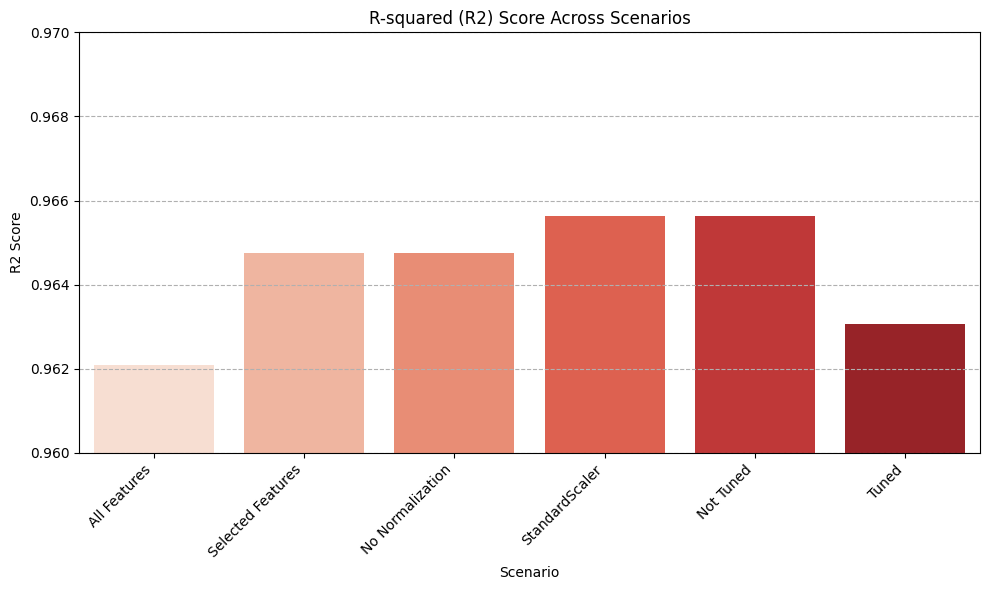

In [59]:
scenario_labels = ['All Features', 'Selected Features', 'No Normalization', 'StandardScaler', 'Not Tuned', 'Tuned']
r2_values = [r2_all_features, r2_selected_features, r2_no_norm, r2_scaled, r2_not_tuned, r2_tuned]

performance_df = pd.DataFrame({
    'Scenario': scenario_labels,
    'R2 Score': r2_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='R2 Score', data=performance_df, palette='Reds')
plt.title('R-squared (R2) Score Across Scenarios')
plt.ylabel('R2 Score')
plt.xlabel('Scenario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.ylim(0.96, 0.97)
plt.tight_layout()
plt.show()

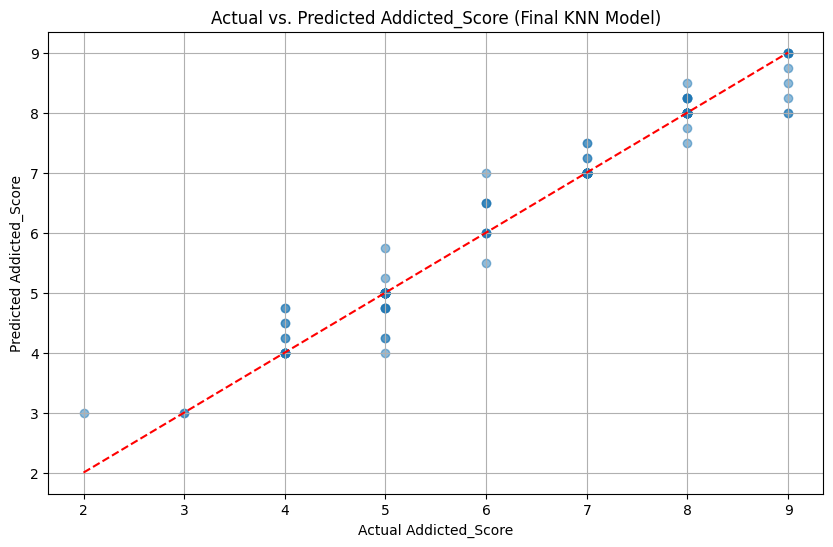

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_not_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Addicted_Score (Final KNN Model)')
plt.xlabel('Actual Addicted_Score')
plt.ylabel('Predicted Addicted_Score')
plt.grid(True)
plt.show()